In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 300
D = 2
K = 3

In [3]:
X = np.zeros([N, D])
X[:100, :] = np.random.randn(100, D) + np.array([0, 0])
X[100:200, :] = np.random.randn(100, D) + np.array([5, 5])
X[200:300, :] = np.random.randn(100, D) + np.array([0, 5])
X

array([[ 6.89132062e-01, -2.10521664e-01],
       [ 1.13771292e+00,  4.00283862e-01],
       [ 1.72486029e+00,  8.54237559e-02],
       [-1.16571309e+00,  1.04423407e+00],
       [-8.92635827e-01, -6.81907373e-01],
       [-1.80574392e-01, -8.14150535e-01],
       [-7.75548735e-01,  5.01094633e-01],
       [-5.48161816e-01,  1.61100669e+00],
       [-4.28653545e-01, -1.33885732e-01],
       [ 4.39823223e-01,  6.44071942e-01],
       [-1.62507339e-01,  6.81969017e-01],
       [ 1.02701432e-01,  7.48846079e-01],
       [ 4.71172839e-01,  9.52764790e-02],
       [ 5.50924998e-01,  2.29092180e+00],
       [-1.15260593e+00, -1.46162571e-01],
       [ 2.42683507e+00,  1.51965695e+00],
       [ 6.96907992e-01,  7.06755788e-01],
       [-2.39935810e-02, -1.37800242e+00],
       [ 1.34454360e-01, -1.74722069e+00],
       [ 5.69307712e-01, -3.37069190e-01],
       [-7.62341793e-01, -1.35336195e+00],
       [-5.00296838e-01,  4.86829985e-01],
       [-1.05889442e+00, -5.10001124e-01],
       [ 1.

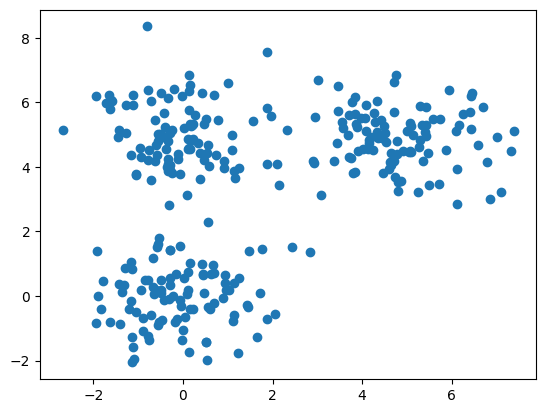

In [4]:
plt.scatter(X[:, 0], X[:, 1])


In [5]:
# choose clusters centers randomly:
clusters_centers = np.zeros((K, D))
for k in range(K):
    i = np.random.choice(N)
    clusters_centers[k] = X[i]
clusters_centers

array([[ 2.14044347,  3.43668105],
       [ 0.77697657,  5.45660002],
       [-0.01856011,  6.19023732]])

In [6]:
# k-means loop:
max_iter = 20
clusters_identities = np.zeros(N)
list_clusters_identities = []

for i in range(max_iter):
    old_clusters_identities = clusters_identities.copy()
    list_clusters_identities.append(old_clusters_identities)

    for n in range(N):
        closest_k = -1
        min_dist = float('inf')
        for k in range(K):
            d = (X[n] - clusters_centers[k]).dot(X[n] - clusters_centers[k])
            if d < min_dist:
                min_dist = d
                closest_k = k
        clusters_identities[n] = closest_k
    
    for k in range(K):
        clusters_centers[k, :] = X[clusters_identities==k].mean(axis=0)
    
    if np.all(old_clusters_identities == clusters_identities):
        print(f"Converged at step {i}")
        break

Converged at step 7


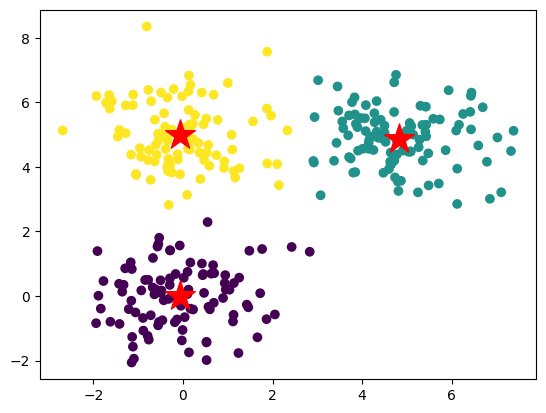

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=clusters_identities)
plt.scatter(clusters_centers[:, 0], clusters_centers[:, 1], marker='*', s=500, c="red")

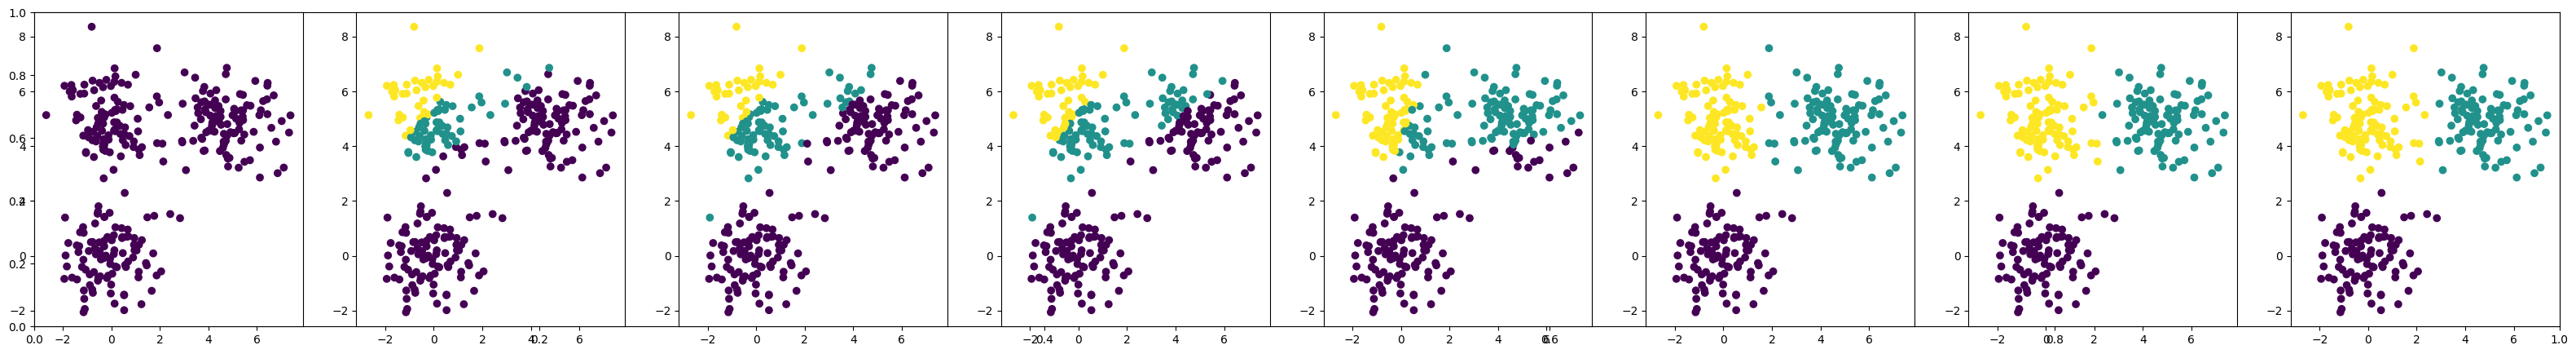

In [8]:
# show training process:
M = len(list_clusters_identities)
fig, ax = plt.subplots(figsize=(5*M, 5))
for i in range(M):
    plt.subplot(1, M, i+1)
    Y = list_clusters_identities[i]
    plt.scatter(X[:, 0], X[:, 1], c=Y)